In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import seaborn as sns
import time

from game import *
from utils import *
from plots import *
from agents import *
from T4T import *

palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif', rc={'font.size':12, 'mathtext.fontset': 'cm'})

# Greedy Trustee

## DQN

150 games

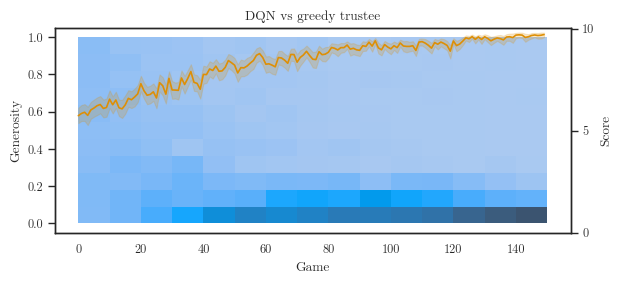

In [11]:
nAgents = 30
nGames = 150

agents = []
IDs = []
for n in range(nAgents):
    agents.append(
        DQN(
            'investor',
            ID=f"DQN{n}",
            seed=n,
            nNeurons=100,
            alpha=0.05,
            gamma=0.5,
            tau=4,
            explore='exponential',
            update='SARSA',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames))
    IDs.append(agents[-1].ID)

data = run(agents, nGames=nGames, opponent='greedy', train=True).query("ID in @IDs")
data.to_pickle("data/DQN_LT1.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='DQN vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((0, 5, 10)))
plt.tight_layout()

15 games

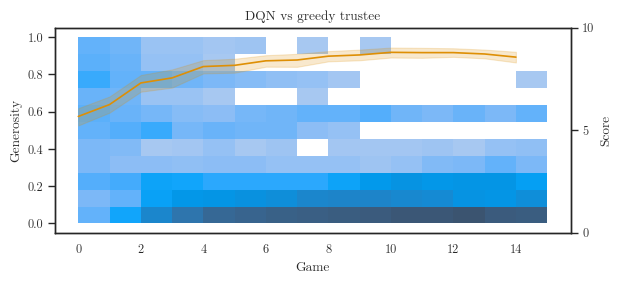

In [2]:
nAgents = 30
nGames = 15

agents = []
IDs = []
for n in range(nAgents):
    agents.append(
        DQN(
            'investor',
            ID=f"DQN{n}",
            seed=n,
            nNeurons=100,
            tau=7.5,
            alpha=0.044,
            gamma=0.87,
            explore='exponential',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames))
    IDs.append(agents[-1].ID)

data = run(agents, nGames=nGames, opponent='greedy', train=True).query("ID in @IDs")
data.to_pickle("data/DQN_LT2.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='DQN vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((0, 5, 10)))
plt.tight_layout()

# IBL

150 games

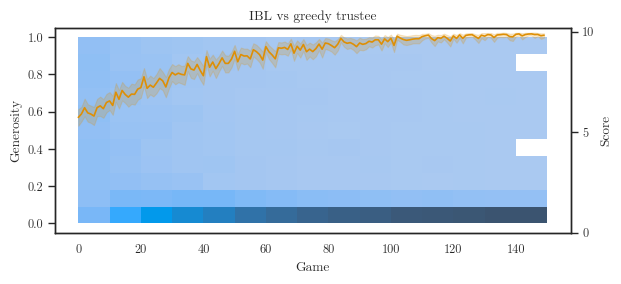

In [8]:
nAgents = 30
nGames = 150

agents = []
IDs = []
for n in range(nAgents):
    agents.append(
        IBL(
            'investor',
            ID=f"IBL{n}",
            seed=n,
            thrA=-1,
            gamma=0.5,
            tau=4,
            explore='exponential',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames))
    IDs.append(agents[-1].ID)

data = run(agents, nGames=nGames, opponent='greedy', train=True).query("ID in @IDs")
data.to_pickle("data/IBL_LT1.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((0, 5, 10)))
plt.tight_layout()

15 games

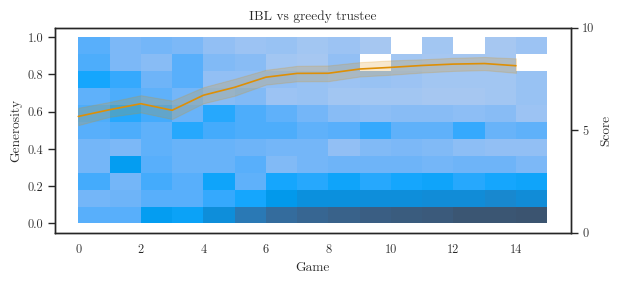

In [12]:
nAgents = 30
nGames = 15

agents = []
IDs = []
for n in range(nAgents):
    agents.append(
        IBL(
            'investor',
            ID=f"IBL{n}",
            seed=n,
            thrA=-1.82,
            decay=0.62,
            sigma=0.85,
            tau=4.1,
            gamma=0.07,
            explore='exponential',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames))
    IDs.append(agents[-1].ID)

data = run(agents, nGames=nGames, opponent='greedy', train=True).query("ID in @IDs")
data.to_pickle("data/IBL_LT2.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((0, 5, 10)))
plt.tight_layout()

# NEF

## Combined Plot

games 150

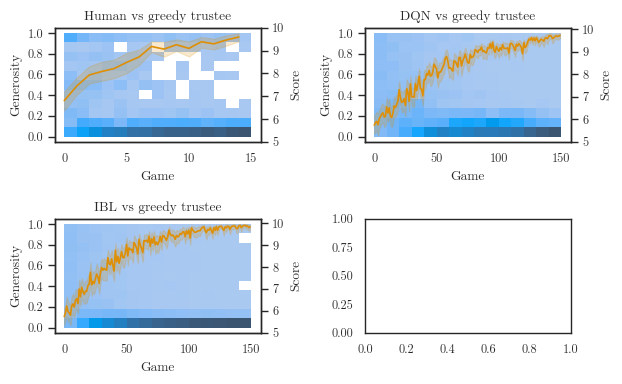

In [12]:
data_human = pd.read_pickle("data/human_data_cleaned.pkl").query("orientation=='proself' & opponent=='greedy' & player=='investor'")
data_dqn = pd.read_pickle("data/DQN_LT1.pkl")
data_ibl = pd.read_pickle("data/IBL_LT1.pkl")
data_nef = pd.read_pickle("data/NEF_LT1.pkl")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=((6.38, 4)))
sns.histplot(data=data_human, x='game', y='generosity', bins=(15, 11), binrange=((0, 15),(0, 1)), ax=axes[0][0], color=palette[0])
ax = axes[0][0].twinx()
sns.lineplot(data=data_human, x='game', y='coins', ax=ax, color=palette[1])
axes[0][0].set(title='Human vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_dqn, x='game', y='generosity', bins=(15, 11), binrange=((0, 150),(0, 1)), ax=axes[0][1], color=palette[0])
ax = axes[0][1].twinx()
sns.lineplot(data=data_dqn, x='game', y='coins', ax=ax, color=palette[1])
axes[0][1].set(title='DQN vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_ibl, x='game', y='generosity', bins=(15, 11), binrange=((0, 150),(0, 1)), ax=axes[1][0], color=palette[0])
ax = axes[1][0].twinx()
sns.lineplot(data=data_ibl, x='game', y='coins', ax=ax, color=palette[1])
axes[1][0].set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

# sns.histplot(data=data_nef, x='game', y='generosity', bins=(15, 11), binrange=((0, 150),(0, 1)), ax=axes[1][1], color=palette[0])
# ax = axes[1][1].twinx()
# sns.lineplot(data=data_nef, x='game', y='coins', ax=ax, color=palette[1])
# axes[1][1].set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
# ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

plt.tight_layout()
fig.savefig(f"plots/combined_LT1.png")

games 15

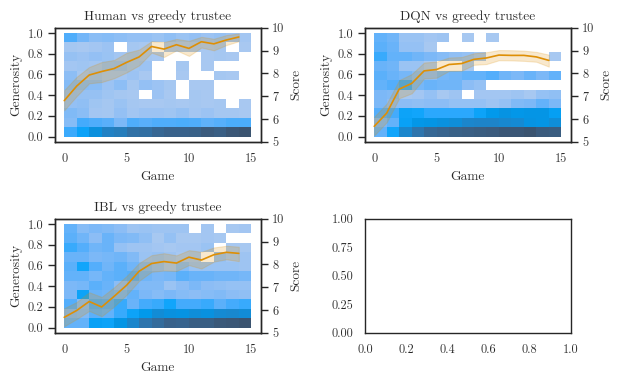

In [10]:
data_human = pd.read_pickle("data/human_data_cleaned.pkl").query("orientation=='proself' & opponent=='greedy' & player=='investor'")
data_dqn = pd.read_pickle("data/DQN_LT2.pkl")
data_ibl = pd.read_pickle("data/IBL_LT2.pkl")
# data_nef = pd.read_pickle("data/NEF_LT2.pkl")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=((6.38, 4)))
sns.histplot(data=data_human, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0][0], color=palette[0])
ax = axes[0][0].twinx()
sns.lineplot(data=data_human, x='game', y='coins', ax=ax, color=palette[1])
axes[0][0].set(title='Human vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_dqn, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[0][1], color=palette[0])
ax = axes[0][1].twinx()
sns.lineplot(data=data_dqn, x='game', y='coins', ax=ax, color=palette[1])
axes[0][1].set(title='DQN vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_ibl, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes[1][0], color=palette[0])
ax = axes[1][0].twinx()
sns.lineplot(data=data_ibl, x='game', y='coins', ax=ax, color=palette[1])
axes[1][0].set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

# sns.histplot(data=data_nef, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=axes[1][1], color=palette[0])
# ax = axes[1][1].twinx()
# sns.lineplot(data=data_nef, x='game', y='coins', ax=ax, color=palette[1])
# axes[1][1].set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
# ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

plt.tight_layout()
fig.savefig(f"plots/combined_LT2.png")

# Generous Trustee

## DQN

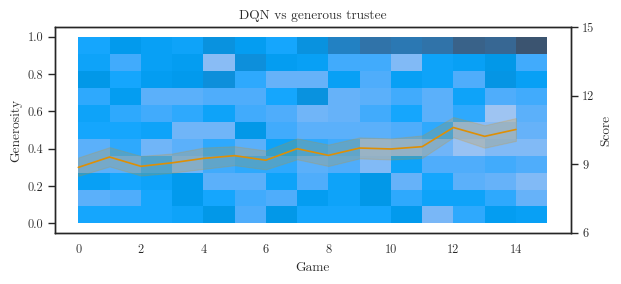

In [24]:
nAgents = 30
nGames = 15
opponent = 'generous'

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
        'investor',
        ID=f"DQN{n}",
        seed=seed if nAgents==1 else n,
        nNeurons=50,
        alpha=0.1,
        gamma=0.1,
        explore='exponential',
        w_s=1.0,
        w_o=0.0,
        w_i=0.0,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes, color=palette[0])
ax2 = axes.twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes.set(title=f'DQN vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

## IBL

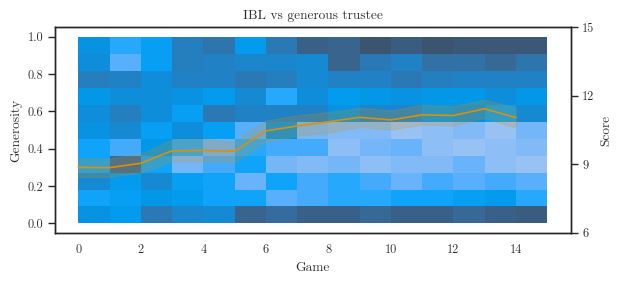

In [11]:
nAgents = 30
nGames = 15
opponent = 'generous'

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
        'investor',
        ID=f"IBL{n}",
        seed=seed if nAgents==1 else n,
        thrA=-0.79,
        decay=-0.49,
        sigma=0.92,
        tau=4.1,
        gamma=0.01,
        explore='exponential',
        w_s=1.0,
        w_o=0.0,
        w_i=0.0,
        nGames=nGames)
    )

agentIDs = [agent.ID for agent in agents]
sim = run(agents, nGames=nGames, opponent=opponent).query("ID in @agentIDs")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=sim, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=axes, color=palette[0])
ax2 = axes.twinx()
sns.lineplot(data=sim, x='game', y='coins', ax=ax2, color=palette[1])
axes.set(title=f'IBL vs {opponent} trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((6,9,12,15)))

plt.tight_layout()

# Greedy Investor

## DQN

150

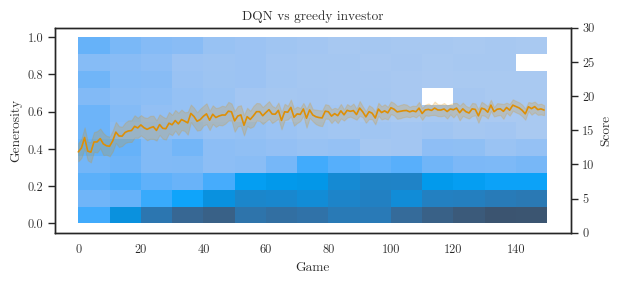

In [7]:
nAgents = 30
nGames = 150

agents = []
IDs = []
for n in range(nAgents):
    agents.append(
        DQN(
            'trustee',
            ID=f"DQN{n}",
            nActions=31,
            seed=n,
            nNeurons=100,
            alpha=0.05,
            gamma=0.5,
            tau=4,
            explore='exponential',
            update='SARSA',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames))
    IDs.append(agents[-1].ID)

data = run(agents, nGames=nGames, opponent='greedy', train=True).query("ID in @IDs")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='DQN vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((0, 5, 10, 15, 20, 25, 30)))
plt.tight_layout()

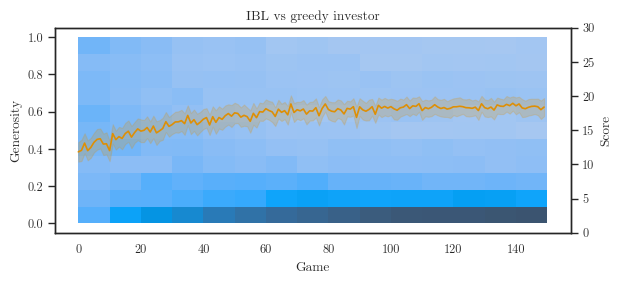

In [8]:
nAgents = 30
nGames = 150

agents = []
IDs = []
for n in range(nAgents):
    agents.append(
        IBL(
            'trustee',
            ID=f"IBL{n}",
            nActions=31,
            seed=n,
            thrA=-2,
            gamma=0.5,
            tau=4,
            explore='exponential',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames))
    IDs.append(agents[-1].ID)

data = run(agents, nGames=nGames, opponent='greedy', train=True).query("ID in @IDs")
data.to_pickle("data/IBL_LT3.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='IBL vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score', yticks=((0, 5, 10, 15, 20, 25, 30)))
plt.tight_layout()